<a href="https://colab.research.google.com/github/Jency07/Deep-learning-lab/blob/main/20MAI0026_Transfer_Learning_ConvNet_Fixed_Feature_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ACTIVITY 1a - Transfer Learning Implementation - New dataset is small and similar to original dataset - ConvNet as Fixed Feature Extractor***

Using a pre-trained model for feature extraction: When working with a small dataset, it is a common practice to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training. In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.

Original Dataset - Imagenet Dataset

New Dataset - Dogs vs Cats Dataset

## **1. Importing libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

## **2. Loading the dataset**

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Roll No: 20MAI0026
*****************************




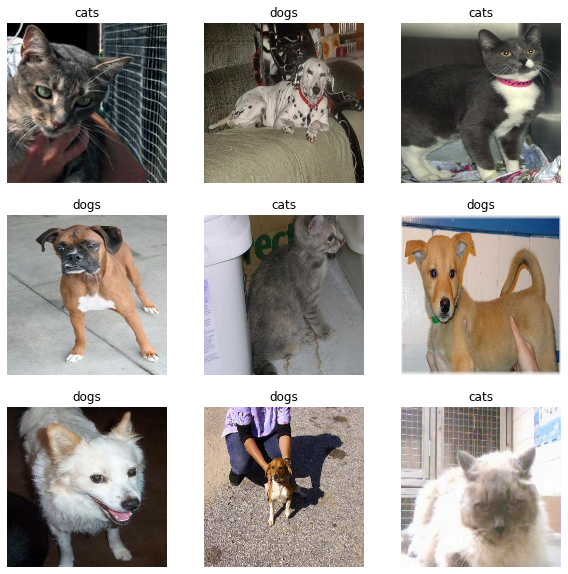

In [ ]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## **3. Train Test Split**

In [ ]:

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

#defining training and test sets
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


## **4. Feature Engineering**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Image Data Augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

## **5. Base Model Creation**

In [ ]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

## **6. Compiling the model**

In [ ]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Roll No: 20MAI0026
*****************************


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_2 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_2 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 

## **7. Training the model**

In [ ]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Roll No: 20MAI0026
*****************************


Epoch 1/10
63/63 [==============================] - 24s 276ms/step - loss: 0.3594 - accuracy: 0.8345 - val_loss: 0.0572 - val_accuracy: 0.9752
Epoch 2/10
63/63 [==============================] - 16s 243ms/step - loss: 0.1368 - accuracy: 0.9434 - val_loss: 0.2303 - val_accuracy: 0.9332
Epoch 3/10
63/63 [==============================] - 16s 241ms/step - loss: 0.1731 - accuracy: 0.9348 - val_loss: 0.0700 - val_accuracy: 0.9765
Epoch 4/10
63/63 [==============================] - 16s 246ms/step - loss: 0.0982 - accuracy: 0.9659 - val_loss: 0.0499 - val_accuracy: 0.9740
Epoch 5/10
63/63 [==============================] - 16s 247ms/step - loss: 0.0643 - accuracy: 0.9736 - val_loss: 0.0452 - val_accuracy: 0.9765
Epoch 6/10
63/63 [==============================] - 16s 243ms/step - loss: 0.0854 - accuracy: 0.9703 - val_loss: 0.0537 - val_accuracy: 0.9802
Epoch 7/10
63/63 [==============================] - 16s 241ms/step - loss: 0.0856 - accurac

## **8. Testing the model**

Predictions:
 [0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1]
Labels:
 [0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1]


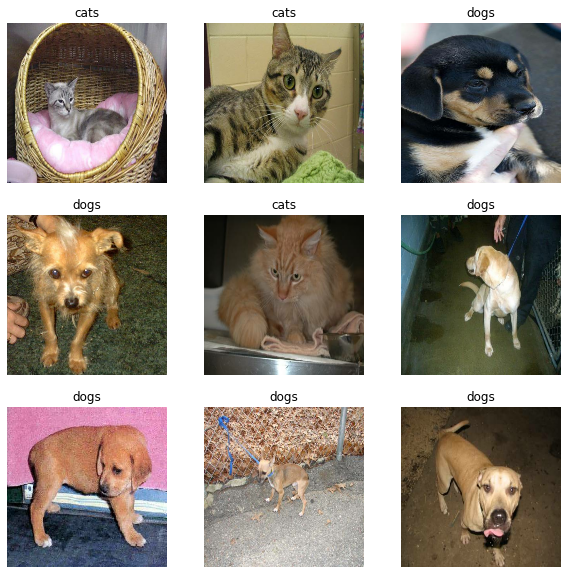

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

## ***9. Evaluation Metrics***

### ***Accuracy***

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

6/6 [==============================] - 1s 70ms/step - loss: 0.0488 - accuracy: 0.9844
Test accuracy : 0.984375
